In [16]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\haman\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Load Dataset
data = 'https://raw.githubusercontent.com/hamant-jagwan/Machine_Learning_UPES_2nd_sem/refs/heads/main/Dataset/Spam_emails.csv'
df = pd.read_csv(data, encoding= 'ISO-8859-1')

In [19]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [20]:
df.shape

(5728, 2)

In [21]:
# Generate and display word cloud
text_data = " ".join(df["text"])
wordcloud = WordCloud(width=800, height=400,background_color='white', stopwords='english').generate(text_data)


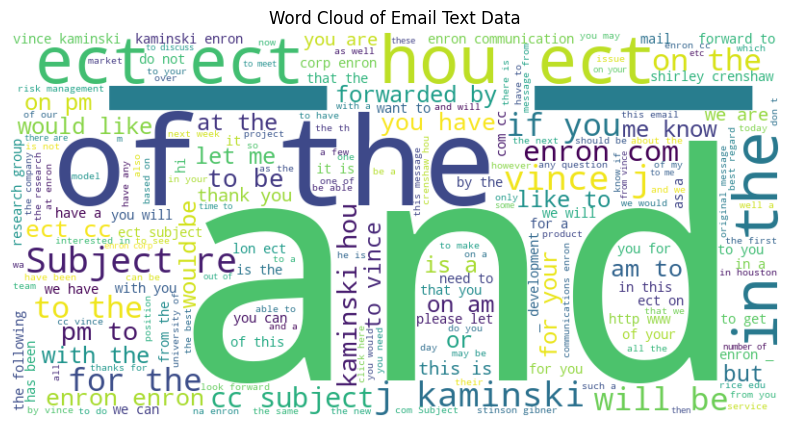

In [22]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Email Text Data")
plt.show()


In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["spam"], test_size=0.2, random_state=42)

TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer is a technique used to convert text data into numerical values, making it suitable for machine learning models. It assigns importance to words based on their frequency in a document and across the dataset.


Why Use TF-IDF?
1. Gives higher importance to rare but meaningful words.
2. Reduces the impact of frequently occurring words like "the" and "is."
3. Helps improve text classification by highlighting important terms.

![alt text](<Screenshot 2025-04-04 110038.png>)

In [24]:
# Create and train SVM model

svm_model = make_pipeline(TfidfVectorizer(stop_words="english"), SVC(kernel='linear'))
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("SVM Classification Report:\n", svm_report)

SVM Accuracy: 0.99
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [25]:
# Create and train Logistic Regression model
logistic_model = make_pipeline(TfidfVectorizer(stop_words="english"), LogisticRegression(max_iter=1000))
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_report = classification_report(y_test, logistic_pred)

print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print("Logistic Regression Classification Report:\n", logistic_report)

Logistic Regression Accuracy: 0.98
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       856
           1       0.99      0.91      0.95       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

